In [20]:
#pip install -U altair vega_datasets notebook vega

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [3]:
#primeiro habilitamos o altair para rodar no notebook, depois importamos um código de polígonos em formato Json, que é 
#suportado pelo altair. Em seguida definimos como será a coloração do gráfico, que se dará de forma gradual, para isso,
#usamos o :Q, que irá interpretar o gráfico de forma quantitativa. Em seguida inserimos o tooltip, que irá mostrar as
#informações ao passar o mouse por cima do gráfico. Por último, dizemos qual será o arquivo que ele irá confrontar com o 
#mapa para poder gerar o gráfico.
alt.renderers.enable('notebook')
world= alt.topo_feature('https://cdn.jsdelivr.net/npm/world-atlas@2/countries-110m.json','countries')
consumoalcool=alt.Chart(world).mark_geoshape().encode(
    color=alt.Color('Alcohol:Q', title = 'Consumo de Alcool em Litros'),
    tooltip = [alt.Tooltip('properties.name:N', title = 'País'), alt.Tooltip('Alcohol:N', title = 'Consumo em Litros')]
).transform_lookup(
    lookup = 'properties.name',
    from_= alt.LookupData('https://raw.githubusercontent.com/Hermes-Nascimento/Consumo-de-Alcool/master/total-alcohol-consumption-per-capita-litres-of-pure-alcohol.csv', 'Entity',['Alcohol'])
).properties(
    width=1000,
    height=600,
    title='Consumo de Álcool Puro Per Capta em 2016'
)

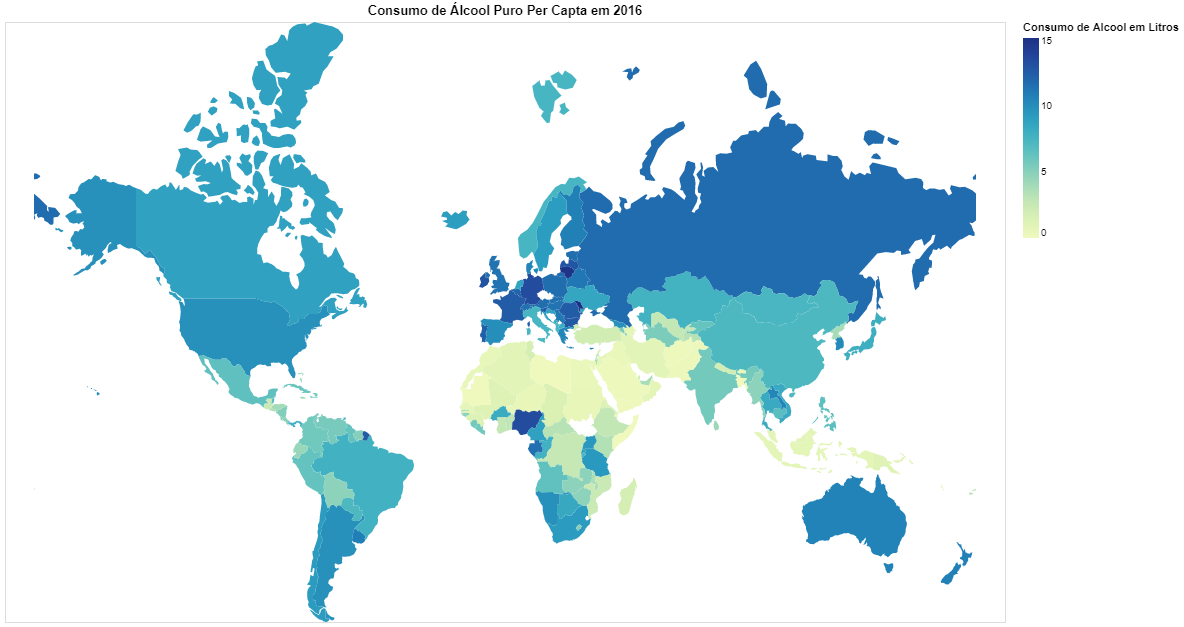

In [4]:
consumoalcool

In [5]:
consumoalcool.save('consumoalcool.html')

In [6]:
#primeiro o altair para rodar no notebook. Depois buscamos a base de dados do arquivo no github e fazemos filtros nele
#para conter apenas os países que queremos. após isso, criamos um gráfico de linhas com pontos demarcando os dados para
#facilitar na interação do gráfico. Temos também um tooltip para interagir.
alt.renderers.enable('notebook')
df=pd.read_csv('https://raw.githubusercontent.com/Hermes-Nascimento/Consumo-de-Alcool/master/per-capita-alcohol-1890.csv')
df=df[(df['Entity']=='United States') | (df['Entity']=='France') | (df['Entity']=='Belgium') | (df['Entity']=='Germany')]
consumoalcooltempo=alt.Chart(df).mark_line(point=True).encode(
    x=alt.X('Year:N', title='Ano'),
    y=alt.Y('Per capita alcohol consumption (litres per person per year)',title='Consumo de Álcool Per Capta (L)'),
    color=alt.Color('Entity', title='País'),
    tooltip=([alt.Tooltip('Per capita alcohol consumption (litres per person per year)', title='Consumo(L)') , alt.Tooltip('Entity', title='País')])
).properties(
    width=1000,
    height=600,
    #title='Consumo de Álcool (L) em Série Temporal de Países Com Alto Consumo de Álcool'
)

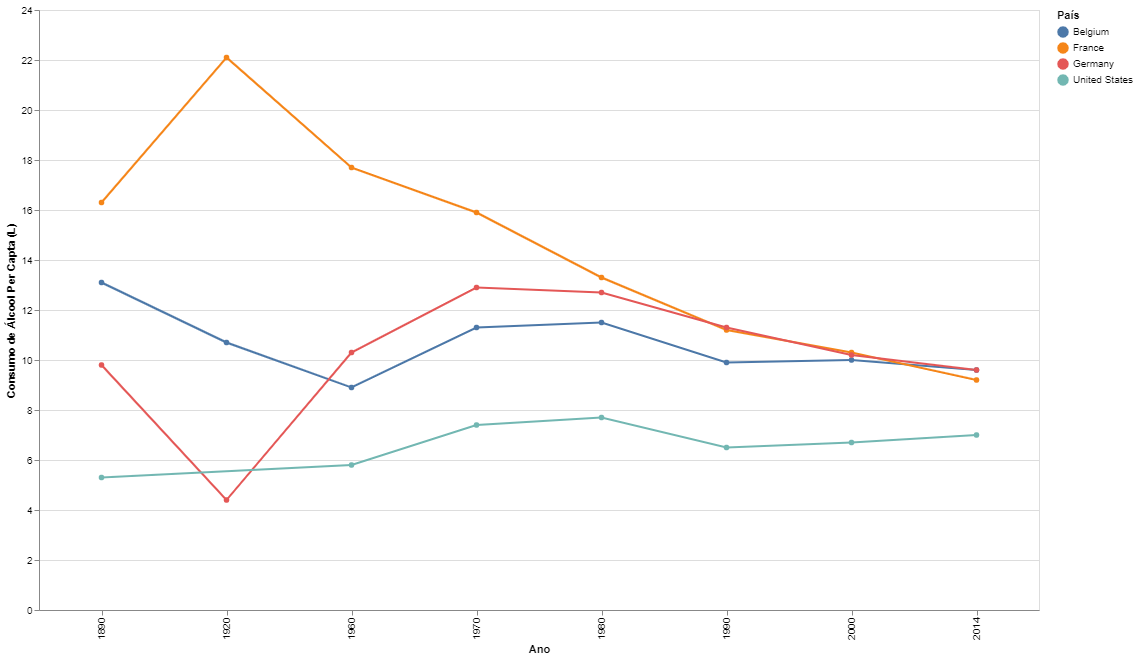

In [7]:
consumoalcooltempo

In [8]:
consumoalcooltempo.save('consumoalcooltempo.html')

In [9]:
#primeiro habilitamos o altair para rodar no notebook, depois lemos o arquivo que se encontra no github. Criamos um gráfico
#de círculos onde o tamanho do círculo é um indicativo do tamanho da população do país achamos desnecessário colocar legenda
#pois ficaria uma legenda muito grande e pouco representativa, preferimos colocar, novamente, um tooltip que dá as informações
#necessárias.
alt.renderers.enable('notebook')
df1=pd.read_csv('https://raw.githubusercontent.com/Hermes-Nascimento/Consumo-de-Alcool/master/alcohol-consumption-vs-gdp-per-capita.csv')
df1=df1[df1['Year']==2016]
df1.fillna(value=0,inplace=True)
df1.columns=['Entity', 'Code', 'Year',
       'Consumo',
       'GDP per capita', 'Population']
consumoalcoolpib=alt.Chart(df1).mark_circle().encode(
    alt.Y('Consumo',title='Consumo (L)', scale=alt.Scale(zero=False)),
    alt.X('GDP per capita:Q', title='PIB Per Capta',scale=alt.Scale(zero=False, padding=1)),
    color=alt.Color('Entity', title='País', legend=None),
    size=alt.Size('Population:N',legend=None),
    tooltip=[alt.Tooltip('Entity', title='País'), alt.Tooltip('Consumo', title='Consumo (L)'), alt.Tooltip('GDP per capita:Q', title='PIB Per Capta')]
).properties(
    width=1000,
    height=600,
    #title='Consumo de Álcool Per Capta (L) VS PIB Per Capta (US$) em 2016'
)

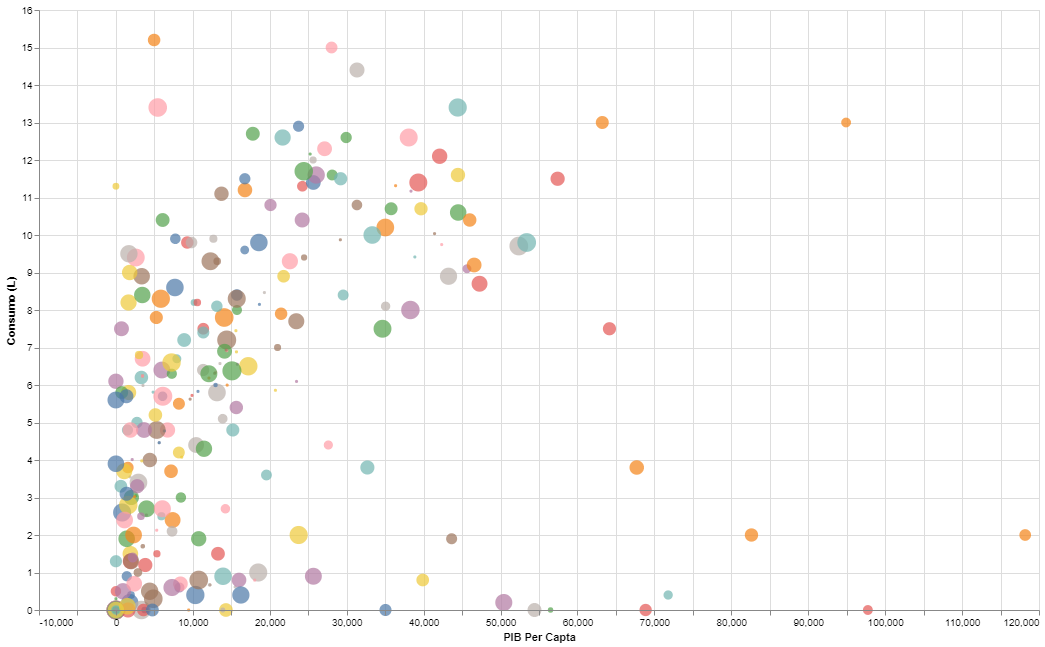

In [10]:
consumoalcoolpib

In [11]:
df=pd.read_csv('https://raw.githubusercontent.com/Hermes-Nascimento/Consumo-de-Alcool/master/number-of-deaths-by-risk-factor.csv')

In [12]:
df=df[df['Year']==2017]
df=df[df['Entity']=='World']

In [13]:
df=pd.melt(df, id_vars=['Entity','Code', 'Year'], var_name='Doença')

In [14]:
df=df.dropna()
df['value']=df['value'].astype('int')

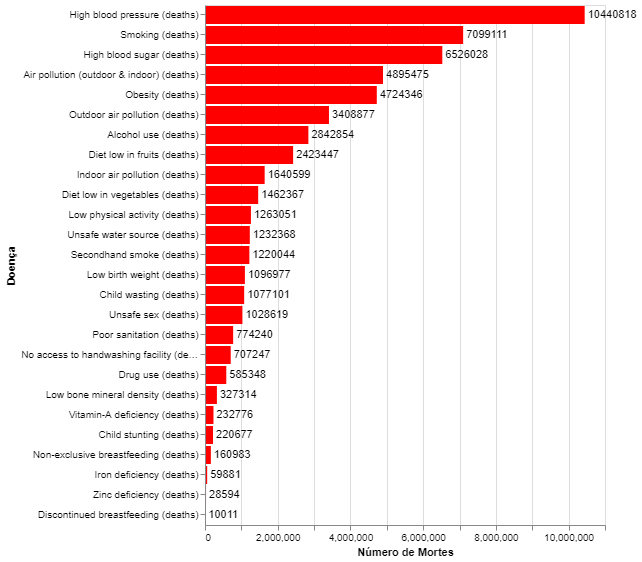

In [15]:
alt.renderers.enable('notebook')
bars=alt.Chart(df).mark_bar().encode(
    alt.X('value',title='Número de Mortes'),
    y=alt.Y('Doença',sort=alt.EncodingSortField(field='value',order="descending")),
    color=alt.value('red'),
    tooltip=[alt.Tooltip('Doença',title='Doença'),alt.Tooltip('value:N',title='Número de Mortes')]
)
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='value:N',
    color=alt.value('black')
)
bars+text

In [2]:
df2=pd.read_csv('https://raw.githubusercontent.com/Hermes-Nascimento/Consumo-de-Alcool/master/alcohol-expenditure-as-share-of-total.csv')

In [3]:
df2=df2.groupby('Year',as_index=False)['Indicator:Alcohol expenditure as a per cent of total household expenditure (%)'].mean()

In [4]:
df2['Indicator:Alcohol expenditure as a per cent of total household expenditure (%)']=df2['Indicator:Alcohol expenditure as a per cent of total household expenditure (%)'].round(2)

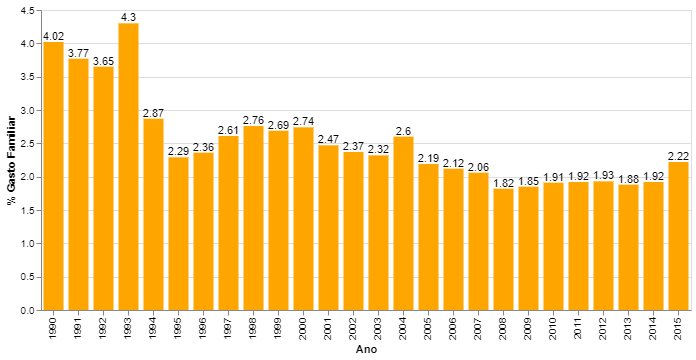

In [5]:
alt.renderers.enable('notebook')
bars=alt.Chart(df2).mark_bar(size=20).encode(
    alt.X('Year:N', title='Ano', scale=alt.Scale(rangeStep=25)),
    alt.Y('Indicator:Alcohol expenditure as a per cent of total household expenditure (%):Q', title='% Gasto Familiar'),
    color=alt.value('Orange')
)
text = bars.mark_text(
    align='center',
    baseline='middle',
    dy=-5  
).encode(
    text='Indicator:Alcohol expenditure as a per cent of total household expenditure (%):Q',
    color=alt.value('black')
)
bars+text